In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

In [2]:
DIRECTORY = r'data'
FOLDERS = ['test', 'train', 'val']

CLASS = ['NORMAL','PNEUMONIA']

In [3]:
# Pre processing
test_data = []
train_data = []
val_data = []

for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASS:
        image_path = os.path.join(folder_path, classification)
        for image in os.listdir(image_path):
            try:
                image_url = os.path.join(image_path,image)
                arr = cv2.imread(image_url)
                arr = cv2.resize(arr, (100, 100))
                label = CLASS.index(classification)
                if folder == 'train':
                    train_data.append([arr, label])
                elif folder == 'test':
                    test_data.append([arr, label])
                else:
                    val_data.append([arr, label])
            except Exception as e:
                print(e)

In [4]:
print(len(test_data))
print(len(train_data))
print(len(val_data))

624
5216
16


In [5]:
import random

random.shuffle(train_data)

In [6]:
X = []
y = []

for feature, label in train_data:
    X.append(feature)
    y.append(label)

In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
print(X.shape)
print(y.shape)
X = X.reshape(-1, 100, 100, 3)
print(X.shape)
X = X/255

(5216, 100, 100, 3)
(5216,)
(5216, 100, 100, 3)


In [9]:
import pickle

pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

In [10]:
X.shape[1:]

(100, 100, 3)

In [11]:
import keras 
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.models import Sequential

In [12]:
# Creating model
model = Sequential()

In [13]:
#CONV Layer1
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer2
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#CONV Layer3
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPool2D(2,2))
#FLATTERN
model.add(Flatten())
#DENSE LAYERS
model.add(Dense(256, input_shape = X.shape[1:], activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
#O/P LAYER
model.add(Dense(2, activation = 'sigmoid'))

#COMPILE
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Model training
graph = model.fit(X,y, epochs = 8, batch_size = 30, validation_split = 0.1)

Epoch 1/8
157/157 [==============================] - 57s 346ms/step - loss: 0.3200 - accuracy: 0.8683 - val_loss: 0.1286 - val_accuracy: 0.9483
Epoch 2/8
157/157 [==============================] - 54s 346ms/step - loss: 0.1103 - accuracy: 0.9595 - val_loss: 0.1201 - val_accuracy: 0.9579
Epoch 3/8
157/157 [==============================] - 54s 347ms/step - loss: 0.0851 - accuracy: 0.9678 - val_loss: 0.0985 - val_accuracy: 0.9598
Epoch 4/8
157/157 [==============================] - 55s 348ms/step - loss: 0.0676 - accuracy: 0.9755 - val_loss: 0.1027 - val_accuracy: 0.9770
Epoch 5/8
157/157 [==============================] - 55s 353ms/step - loss: 0.0658 - accuracy: 0.9753 - val_loss: 0.0648 - val_accuracy: 0.9808
Epoch 6/8
157/157 [==============================] - 54s 342ms/step - loss: 0.0490 - accuracy: 0.9825 - val_loss: 0.0676 - val_accuracy: 0.9751
Epoch 7/8
157/157 [==============================] - 54s 344ms/step - loss: 0.0357 - accuracy: 0.9874 - val_loss: 0.0987 - val_accuracy:

#### 'accuracy', 'loss', 'val_accuracy', 'val_loss'
#### These are the metrics that we can track and visualize using matplotlib

In [15]:
model.summary()

import matplotlib.pyplot as plt
%matplotlib inline

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

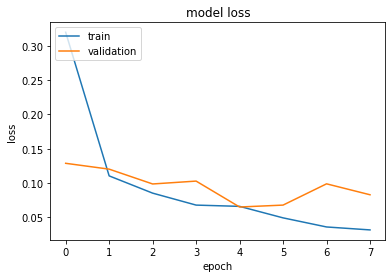

In [16]:
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

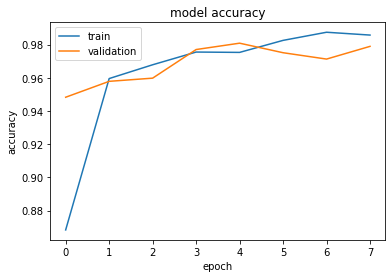

In [17]:
plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
# Save model
import h5py
model.save('saved_models/pnemonia_prediction.h5',overwrite=True)